In [36]:
from numpy import*
import pandas as pd 
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [22]:
from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


In [23]:
import io
df = pd.read_csv(io.StringIO(uploaded['diabetes.csv'].decode('utf-8')))

In [24]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [25]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [26]:
df.shape

(768, 9)

In [30]:
#Creating Arrays for the Features and the Response Variable
target_column = ['Outcome'] 
predictors = list(set(list(df.columns))-set(target_column))
df[predictors] = df[predictors]/df[predictors].max()
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,0.226180,0.198210,0.000000,0.058824,0.176471,0.352941,1.0
Glucose,768.0,0.607510,0.160666,0.000000,0.497487,0.587940,0.704774,1.0
BloodPressure,768.0,0.566438,0.158654,0.000000,0.508197,0.590164,0.655738,1.0
SkinThickness,768.0,0.207439,0.161134,0.000000,0.000000,0.232323,0.323232,1.0
Insulin,768.0,0.094326,0.136222,0.000000,0.000000,0.036052,0.150414,1.0
BMI,768.0,0.476790,0.117499,0.000000,0.406855,0.476900,0.545455,1.0
DiabetesPedigreeFunction,768.0,0.194990,0.136913,0.032231,0.100723,0.153926,0.258781,1.0
Age,768.0,0.410381,0.145188,0.259259,0.296296,0.358025,0.506173,1.0
Outcome,768.0,0.348958,0.476951,0.000000,0.000000,0.000000,1.000000,1.0


In [31]:
#Creating the Training and Test Datasets
X = df[predictors].values
y = df[target_column].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)
print(X_train.shape); print(X_test.shape)

(537, 8)
(231, 8)


# Building, Predicting, and Evaluating the Neural Network Model

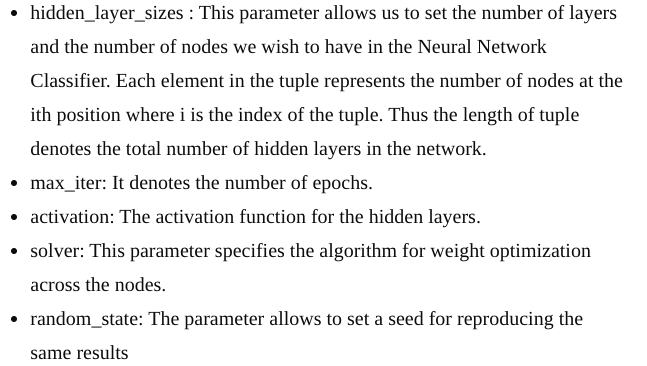

In [32]:
mlp = MLPClassifier(hidden_layer_sizes=(8,8), activation='relu', solver='sgd', max_iter=500)

In [33]:
mlp.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(hidden_layer_sizes=(8, 8), max_iter=500, solver='sgd')

In [34]:
predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test)

In [37]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_train,predict_train))
print(classification_report(y_train,predict_train))

[[358   0]
 [179   0]]
              precision    recall  f1-score   support

         0.0       0.67      1.00      0.80       358
         1.0       0.00      0.00      0.00       179

    accuracy                           0.67       537
   macro avg       0.33      0.50      0.40       537
weighted avg       0.44      0.67      0.53       537



In [38]:
#The next step is to evaluate the performance of the model on the test data that is done with the lines of code below.

print(confusion_matrix(y_test,predict_test))
print(classification_report(y_test,predict_test))

[[142   0]
 [ 89   0]]
              precision    recall  f1-score   support

         0.0       0.61      1.00      0.76       142
         1.0       0.00      0.00      0.00        89

    accuracy                           0.61       231
   macro avg       0.31      0.50      0.38       231
weighted avg       0.38      0.61      0.47       231

